___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [7]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [12]:
df.isna().sum()

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [15]:
df = df.dropna()

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [38]:
len(df[df['review'].apply(lambda x: not x.split())]) # when you do .split() it gives [] if you had empty string OR spaces.

27

In [46]:
df = df.drop(df[df['review'].apply(lambda x: not x.split())].index)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [49]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
cv = CountVectorizer(stop_words='english')

In [122]:
sparse_pos = cv.fit_transform(df[df['label'] == 'pos']['review'])

word_counts = sparse_pos.sum(axis=0)
keys = cv.get_feature_names_out()

word_freq = [(keys[i], word_counts[0, i]) for i in range(len(keys))]
# ============================================== get list [(key1,count),(key2,count)..] for range len(vocab)

word_freq.sort(key=lambda x: x[1],reverse=True)  # key= is like 'sort by', you could do key=len

In [123]:
print('TOP 20 COMMON WORDS USED IN POSITIVE REVIEWS')

for i, (word, count) in enumerate(word_freq[:20], 1):
    print(f"{i:2}. {word:<12} {count}")

TOP 20 COMMON WORDS USED IN POSITIVE REVIEWS
 1. film         5002
 2. movie        2389
 3. like         1721
 4. just         1273
 5. story        1199
 6. good         1193
 7. time         1175
 8. character    1037
 9. life         1032
10. characters   957
11. way          864
12. films        851
13. does         828
14. best         788
15. people       769
16. make         764
17. little       751
18. really       731
19. man          728
20. new          702


In [117]:

sparse_neg = cv.fit_transform(df[df['label'] == 'neg']['review'])

word_counts = sparse_neg.sum(axis=0)
keys = cv.get_feature_names_out()

word_freq = [(keys[i], word_counts[0, i]) for i in range(len(keys))]
# ============================================== get list [(key1,count),(key2,count)..] for range len(vocab)

word_freq.sort(key=lambda x: x[1],reverse=True)  # key= is like 'sort by', you could do key=len

In [119]:
print('TOP 20 COMMON WORDS USED IN NEGATIVE REVIEWS')

for i, (word, count) in enumerate(word_freq[:20], 1):
    print(f"{i:2}. {word:<12} {count}")

TOP 20 COMMON WORDS USED IN NEGATIVE REVIEWS
 1. film         4063
 2. movie        3131
 3. like         1808
 4. just         1480
 5. time         1127
 6. good         1117
 7. bad          997
 8. character    926
 9. story        908
10. plot         888
11. characters   838
12. make         813
13. really       743
14. way          734
15. little       696
16. don          683
17. does         666
18. doesn        648
19. action       635
20. scene        634


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [124]:
X = df['review']
y = df['label']

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [151]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_estimator(model,X_test_tfidf,y_test)

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



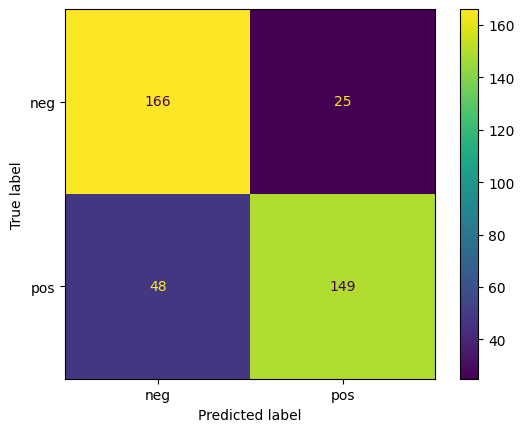

In [134]:
# FIRST we try the models which is best before choosing whiche to give to the PIPELINE
from sklearn.naive_bayes import MultinomialNB
np = MultinomialNB()
np.fit(X_train_tfidf,y_train)

report(np)

rbf SVC REPORT
              precision    recall  f1-score   support

         neg       0.81      0.84      0.83       191
         pos       0.84      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



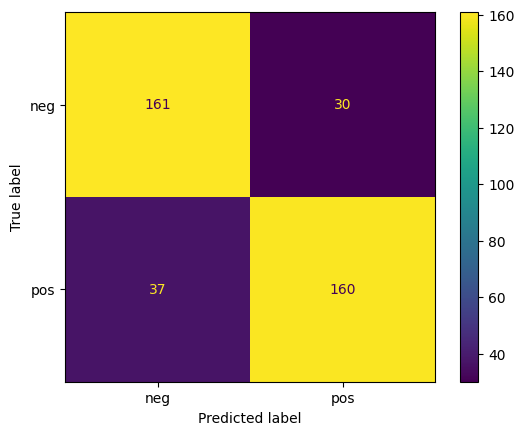

In [139]:
from sklearn.svm import SVC, LinearSVC
rbf_svc = SVC()
linear_svc = LinearSVC()

rbf_svc.fit(X_train_tfidf,y_train)
print('rbf SVC REPORT')
report(rbf_svc)


linear SVC REPORT
              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



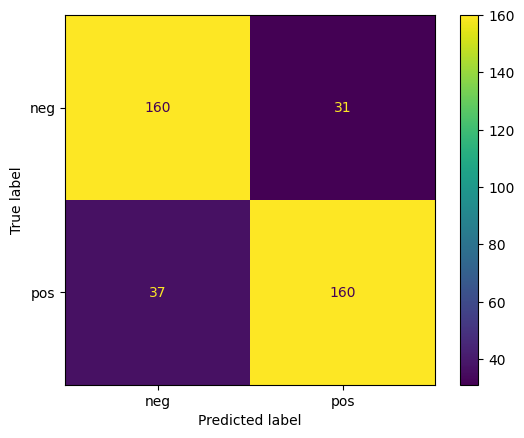

In [140]:
linear_svc.fit(X_train_tfidf,y_train)
print('linear SVC REPORT')
report(linear_svc)

              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



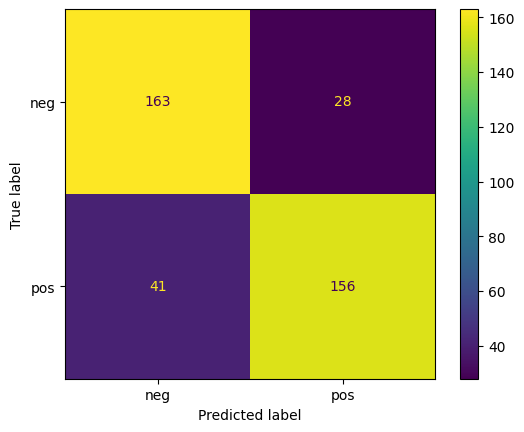

In [141]:
from sklearn.linear_model import LogisticRegression 
logi = LogisticRegression()

logi.fit(X_train_tfidf,y_train)
report(logi)

**WE CHOSE THE LINEAR SVC, NOW WE'LL PUT IT IN PIPELINE AND ALSO RETRAIN IT ON THE WHOLE DATA SET**

In [146]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('svc',LinearSVC())]) # we could directly put the vars tfidf and svc, 
# which will put the params we chose already, but we could just pass them here directly. this is better cuz we need to run those past cells.

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [77]:
#CODE HERE

In [152]:
pipe.fit(X_train,y_train)

,steps,"[('tfidf', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [154]:
pipe_preds = pipe.predict(X_test) 
print(classification_report(y_test, pipe_preds))

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



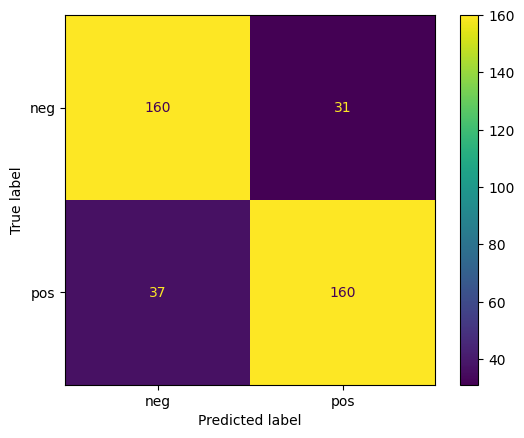

In [155]:
ConfusionMatrixDisplay.from_predictions(y_test,pipe_preds)

In [156]:
# !!!!!!!!!! now retrain, so we could use it on new data, also for model deployement
pipe.fit(X,y)

,steps,"[('tfidf', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


## Great job!